In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml


In [7]:

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [9]:
# Step 3: Split data into Training (70%), Validation (15%), and Testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split X_temp into Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (49000, 784)
Validation data shape: (10500, 784)
Testing data shape: (10500, 784)


In [10]:
# Step 4: Define Two Models
# Model 1: Logistic Regression (Baseline Model)
logistic_model = Pipeline([
    ("scaler", StandardScaler()),  # Scale features for better optimization
    ("classifier", LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial'))
])

# Model 2: Random Forest Classifier (More Advanced)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# Step 5: Train both models using Training Data
print("Training Logistic Regression model...")
logistic_model.fit(X_train, y_train)

print("Training Random Forest model...")
rf_model.fit(X_train, y_train)

Training Logistic Regression model...
Training Random Forest model...


RandomForestClassifier(random_state=42)

In [12]:
# Step 6: Validate the Models (Using Validation Set)
y_val_pred_logistic = logistic_model.predict(X_val)
y_val_pred_rf = rf_model.predict(X_val)

# Step 7: Evaluate Model Performance on Validation Data
val_acc_logistic = accuracy_score(y_val, y_val_pred_logistic)
val_acc_rf = accuracy_score(y_val, y_val_pred_rf)

print(f"Validation Accuracy - Logistic Regression: {val_acc_logistic:.4f}")
print(f"Validation Accuracy - Random Forest: {val_acc_rf:.4f}")

Validation Accuracy - Logistic Regression: 0.9156
Validation Accuracy - Random Forest: 0.9668


In [13]:
# Step 8: Select the Best Model Based on Validation Performance
if val_acc_logistic > val_acc_rf:
    best_model = logistic_model
    best_model_name = "Logistic Regression"
else:
    best_model = rf_model
    best_model_name = "Random Forest"

print(f"Best model selected: {best_model_name}")

Best model selected: Random Forest


In [14]:
# Step 9: Test the Best Model on Test Data
y_test_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Final Test Accuracy ({best_model_name}): {test_acc:.4f}")



Final Test Accuracy (Random Forest): 0.9668


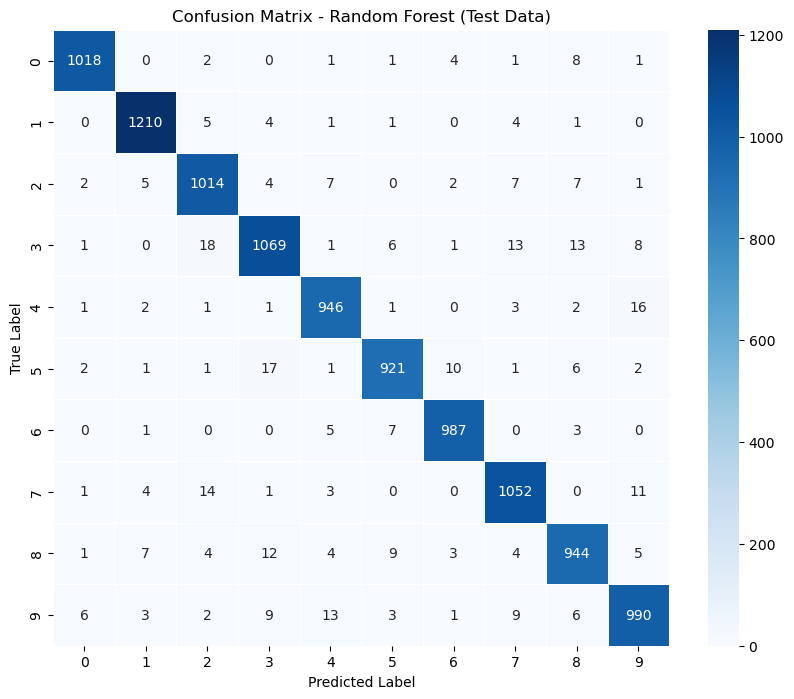

In [15]:
# Step 10: Confusion Matrix for the Best Model
cm_best = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_best, annot=True, fmt="d", cmap='Blues', linewidths=0.5, square=True)
plt.title(f"Confusion Matrix - {best_model_name} (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
# Step 11: Print Classification Report for Best Model
print(f"\nClassification Report - {best_model_name}:")
print(classification_report(y_test, y_test_pred))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1036
           1       0.98      0.99      0.98      1226
           2       0.96      0.97      0.96      1049
           3       0.96      0.95      0.95      1130
           4       0.96      0.97      0.97       973
           5       0.97      0.96      0.96       962
           6       0.98      0.98      0.98      1003
           7       0.96      0.97      0.97      1086
           8       0.95      0.95      0.95       993
           9       0.96      0.95      0.95      1042

    accuracy                           0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500



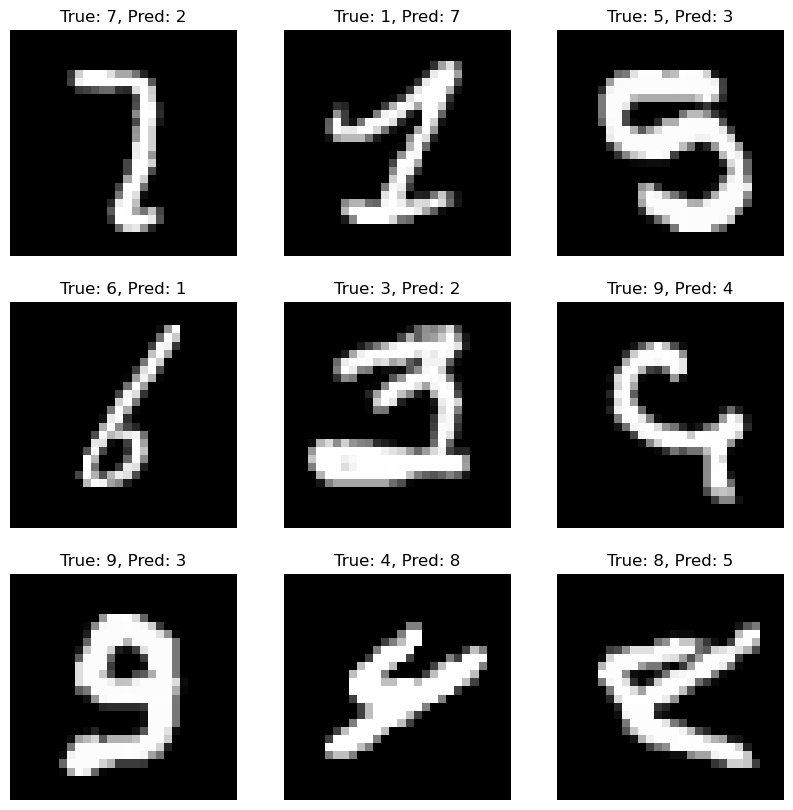

In [31]:
# Get misclassified examples
import random

misclassified_indexes = np.where(y_test != y_test_pred)[0]

# Randomly pick 9 misclassified samples
random_samples = random.sample(list(misclassified_indexes), 9)

# Plot the images with predicted and true labels
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
    plt.axis('off')
plt.show()